Tanamon Tantaksinanukij 6030810621

In [157]:
import pandas as pd
import numpy as np
import folium as fo
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/Maplub/accident_sample_bkk/main/event2019_BKK.csv')
data

,title,latitude,longitude
0,อุบัติเหตุ ถนนรัชดาภิเษก ขาเข้า,13.756988,100.565255
1,อุบัติเหตุ ถนนทางรถไฟเก่าสายปากน้ำ,13.717649,100.565232
2,อุบัติเหตุ ถนนเจริญกรุง ขาเข้า,13.728361,100.515878
3,อุบัติเหตุ กรุงเทพมหานคร,13.753568,100.580294
4,อุบัติเหตุ แยกคลองเตย,13.720805,100.557668
...,...,...,...
3061,อุบัติเหตุ ถนนเพชรบุรี,13.749695,100.548232
3062,อุบัติเหตุ ห้วยขวาง กรุงเทพมหานคร,13.753643,100.580295
3063,อุบัติเหตุ ห้วยขวาง กรุงเทพมหานคร,13.753630,100.580293
3064,อุบัติเหตุ เจริญรัถ 8 (ซอยอยู่ดี),13.704420,100.516291


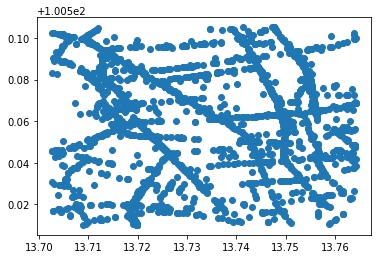

In [9]:
plt.scatter(data['latitude'], data['longitude'], cmap='viridisa')
plt.show()

นำข้อมูลมาทดลองพลอตในแผนที่

In [15]:
longitude =  100.5538272857666
latitude = 13.734465925243732
station_map = fo.Map(
                location = [latitude, longitude], 
                zoom_start = 13)
latitudes = list(data.latitude)
longitudes = list(data.longitude)
labels = list(data.title)

for lat, lng, label in zip(latitudes, longitudes, labels):
    fo.Circle(
      location = [lat, lng],
      radius = 1,
      color = 'green' 
     ).add_to(station_map)
station_map

In [163]:
from sklearn.cluster import AgglomerativeClustering as Agg

In [164]:
accident = np.array(data[['latitude','longitude']].values.tolist())
accident

array([[ 13.75698822, 100.56525484],
       [ 13.71764933, 100.56523204],
       [ 13.72836112, 100.51587805],
       ...,
       [ 13.7536295 , 100.5802926 ],
       [ 13.70441981, 100.51629111],
       [ 13.74915145, 100.51672965]])

In [165]:
n_clusters=300

In [166]:
model = Agg(distance_threshold = None , n_clusters=300).fit(accident)


In [167]:
agg_label = model.labels_

In [168]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

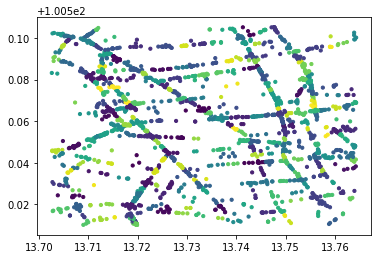

In [182]:
plt.scatter(data['latitude'], data['longitude'], c = agg_label, s=10)
plt.show()

In [170]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [171]:
silhouette_avg = silhouette_score(accident, agg_label)
silhouette_avg

0.5907148620980917

In [172]:
sample_silhouette_values = silhouette_samples(accident, agg_label)

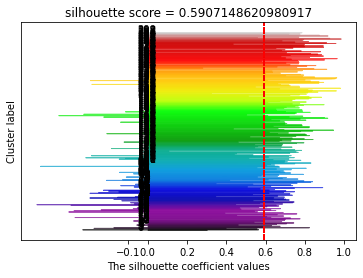

In [173]:
import matplotlib.cm as cm
fig, ax = plt.subplots()
y_lower = 0
for i in range(n_clusters):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[agg_label == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
          0, ith_cluster_silhouette_values,
          facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 100  

    ax.set_title("silhouette score = " + str(silhouette_avg))
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

In [193]:
longitude =  100.5538272857666
latitude = 13.734465925243732
station_map = fo.Map(
                location = [latitude, longitude], 
                zoom_start = 13)
latitudes = list(data.latitude)
longitudes = list(data.longitude)
labels = list(data.title)
def color_producer(agg_label):
    if agg_label < 100:
        return 'green'
    elif 101 <= agg_label or agg_label < 300:
        return 'red'
   

for lat, lng, label in zip(data['latitude'], data['longitude'], agg_label):
    fo.Circle(
      location = [lat, lng],
      radius = 1 , color = color_producer(label)
     ).add_to(station_map)
station_map